In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [192]:
rout_path = 'C:\\Users\\Lenovo\\Desktop\ML\\titanicdataset\\'

In [193]:

df = pd.read_csv(rout_path+'train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [194]:
df.shape

(891, 12)

In [195]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Here we can see that for 'Age ' and ' Cabin '  and ' Embarked 'There is NaN here .
#### we have to replace all NaN with Zero Or Mean of the that features columns .

In [196]:
df.mean()
# I am going replace all NaN values with their respectives Mean Values :

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [197]:
df.Age.fillna(29.699118,inplace=True)


### We not fill Cabin  values by mean because this feature not help us to get target values thats why we leave it.

In [198]:
df.Embarked.fillna(0,inplace=True)

In [199]:
df.isna().sum() # Now no more nan values present in our datasets except cabin  and Embarked.
# but dont worry we need not cabin in our analysis so leave it.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### We also have categorical values in our dataset i.e 'Sex'  and 'Embarked'
### we need to convert it into numerical values by using pandas dummies method.

In [200]:
dummy_data1 = pd.get_dummies(df.Sex)
dummy_data1

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [201]:
dummy_data2 = pd.get_dummies(df.Embarked)
dummy_data2

,0,C,Q,S
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
886,0,0,0,1
887,0,0,0,1
888,0,0,0,1
889,0,1,0,0


In [202]:
# merge these dummy data with dataset 
new_df = pd.concat([df,dummy_data1,dummy_data2],axis=1)

In [203]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,0,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,0,1


### Droping all unnecessary feautures from our dataset :

In [204]:
cleaned_df = new_df.drop(['Name','Ticket','Cabin','Embarked','Sex','PassengerId'],axis=1)
# [2,5,6,7,9,12,13,15,16,17]

In [205]:
#cleaned_df.head()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025AF93F8988>,
      dtype=object)

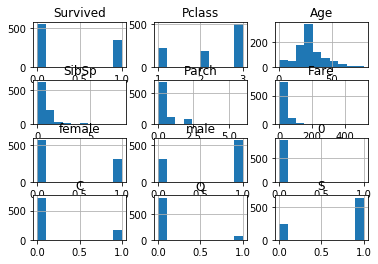

In [206]:
# viz
cleaned_df.hist()

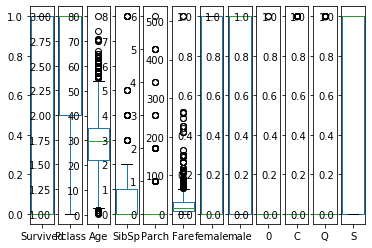

In [207]:
cleaned_df.plot(kind='box',subplots=True,sharex=False,widths=2)
plt.show()

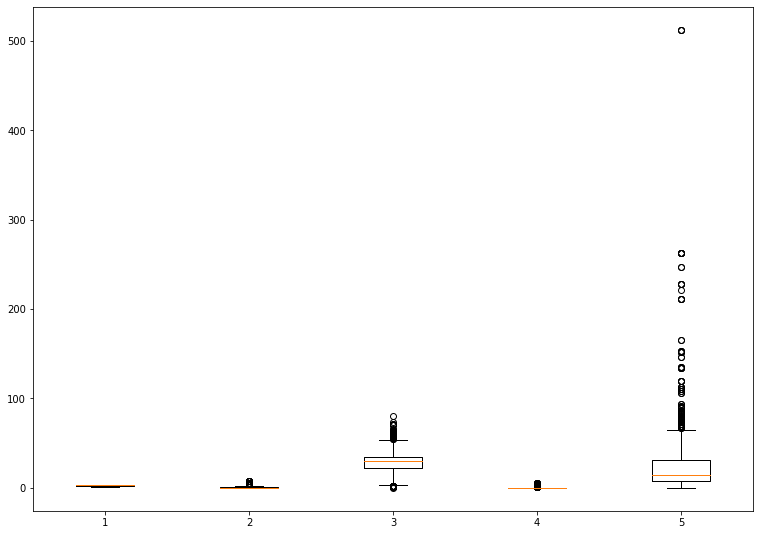

In [208]:
data = [cleaned_df['Pclass'],cleaned_df['SibSp'],cleaned_df['Age'],cleaned_df['Parch'],cleaned_df['Fare']]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data,widths=0.40)
plt.show()

In [209]:
# Choosing indepent and dependent features :
x = new_df.iloc[:,[2,5,6,7,9,12,13,15,16,17]]
x.shape

(891, 10)

In [210]:
y = cleaned_df.iloc[:,0]
y.shape

(891,)

In [211]:
# Scaling Data Using Standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rescaledx = scaler.fit_transform(x)

In [212]:
from sklearn.linear_model import  LogisticRegression
model = LogisticRegression()
model.fit(rescaledx,y)
ypred = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred)
cm

array([[159,   3],
       [ 98,   8]], dtype=int64)

In [213]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred)*100)

62.31343283582089


### preprocess our testing data 

In [214]:
import pandas as pd
import numpy as np
df = pd.read_csv(rout_path+'test.csv')
df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [215]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [216]:
df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [217]:
df.Age.fillna(30.272590,inplace=True)

In [218]:
df.Fare.fillna(35.627188,inplace=True)

In [219]:
df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [220]:
# converting all class value to numerical values :
dm1 = pd.get_dummies(df.Sex)

In [221]:
dm2 = pd.get_dummies(df.Embarked)

In [222]:
new_data = pd.concat([df,dm1,dm2],axis=1)

In [223]:
new_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,0,0,1


In [224]:
x_test2 = new_data.iloc[:,[1,4,5,6,8,11,12,13,14,15]]

In [225]:
x_test2.shape

(418, 10)

In [226]:
df2 = pd.read_csv(rout_path+'gender_submission.csv')

In [227]:
df2.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [228]:
y_test2 = df2.iloc[:,-1]
y_test2.shape

(418,)

In [229]:
# Scaling Data Using Standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rescaledxtest2 = scaler.fit_transform(x_test2)

In [230]:
ypredict2 = model.predict(rescaledxtest2)

In [231]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test2,ypredict2)
cm2

array([[254,  12],
       [ 14, 138]], dtype=int64)

In [232]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test2,ypredict2)*100)

93.77990430622009


Our model gives very Good accuracy for testing data .
i.e  93.7799 % which is fairly good
We use very simple Logistic Regression For our model . 

### Let's Try some other Model    :

In [234]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model3 =  DecisionTreeClassifier(criterion='entropy')
model3.fit(rescaledx,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [241]:
ypred3 = model3.predict(x_test2)

In [243]:
print(accuracy_score(y_test2,ypred3)*100)

27.51196172248804


In [246]:
# Support Vector machine 
from sklearn.svm import SVC
model = SVC()
model.fit(rescaledx,y)
y_pred4 = model.predict(x_test2)
print(accuracy_score(y_test2,y_pred4)*100)

63.63636363636363


In [247]:
# K nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(rescaledx,y)
y_pred5= model.predict(x_test2)
print(accuracy_score(y_test2,y_pred5)*100)

58.85167464114832


In [248]:
# Naive bayes classifiers :
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(rescaledx,y)
y_pred6 = model.predict(x_test2)
print(accuracy_score(y_test2,y_pred6)*100)

36.36363636363637


### Conclusion :

#### Accuracy of Different Classifier :
1. Logistic Regression :  93.77%
2. Naive Bayes Classifier : 36.36%
3. K- Nearest Neighbour :  58.85%
4. Decision Tree : 27.51%
5. Support Vector Machine : 63.63 
After seeing all The Accuracy of Different Classifiers we can say that Logistic Regression Is Best model for our dataset.
We can improve Accuracy of these classifier by using H
